# Carga de Bases de Datos

Vamos a importar los archivos que serviran de ejemplo para cargar diferentes bases de datos

In [ ]:
# librerias para trabajar con el sistema operativo y descomprimir archivos
import os
import zipfile

Descargar desde la nube de Google los repositorios con los que vamos a trabajar
- wget para extraer el archivo.
- --no-check-certificate para omitir certificaciones.
- -O /ruta/databasesLoadData.zip para guardar la salida en una carpeta en ruta con el nombre de _databasesLoadData.zip_

In [4]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /home/jbernal/Data_Science/ML/Redes_Neuronales/databasesLoadData.zip

--2024-10-30 11:45:15--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.78.59, 142.250.78.91, 142.250.78.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.78.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/home/jbernal/Data_Science/ML/Redes_Neuronales/databasesLoadData.zip’

/home/jbernal/Data_ 100%[===================>]  68.34M   862KB/s    in 72s     

2024-10-30 11:46:28 (969 KB/s) - ‘/home/jbernal/Data_Science/ML/Redes_Neuronales/databasesLoadData.zip’ saved [71662510/71662510]



- Guardamos la ruta del archivo en una variable
- Creamos una referencia en memoria del archivo comprimido en modo lectura
- Extraemos el contenido y lo nombramos de la misma forma sin extension dado que sera un directorio.
- Cerramos la instancia

In [5]:
local_zip = '/home/jbernal/Data_Science/ML/Redes_Neuronales/databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/home/jbernal/Data_Science/ML/Redes_Neuronales/')
zip_ref.close()

## Archivos JSON

Vamos a trabajar con el json contenido en la carpeta _sign_mnist_json_. Para ello, importamos las librerias

- json para trabjar con erchivos en este formato
- codecs para descomprimir archivos
- requet para hacer peticiones a la nube
- librerias para el procesamiento de las imagenes: numpy, PIL, matplotlib
- BytesIO para trabajar bytes

In [11]:
import json
import codecs
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Guardamos la ruta del archivo en una variable

In [7]:
url = './sign_mnist_json/data.json'

Deserializamos el json para manejar mejor su contenido

In [8]:
# lista para almacenar los registros del json
data_json = []

# abrimos el archivo con codecs
with codecs.open(url, 'rU', 'utf-8') as js:
    # almacenamos cada registro en la lista
    for line in js:
        data_json.append(json.loads(line))

Cantidad de imagenes contenida en la lista

In [9]:
print(f'Cantidad de imagenes encontradas: {len(data_json)}')

Cantidad de imagenes encontradas: 9


Mostramos el contenido de cualquier imagen, en este caso de la imagen con indice 3

In [10]:
data_json[3]

{'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/58_A.jpg',
 'label': 'a'}

- Creamos una lista donde guardamos las imagenes. 
- Con los datos aislados, podemos descargar cada imagen, por lo que haremos una petición HTTP, la encapsularemos en un objeto BytesIO, será interpretado como una imagen y finalmente se transformará en un array de Numpy

In [12]:
# lista para guardar las imagenes
images = []

for data in data_json:
    reponse = requests.get(data['content'])
    img = np.array(Image.open(BytesIO(reponse.content)))
    images.append([img, data['label']])

Para verificar la integridad del contenido lo mostraremos en pantalla con matplotlib, donde tomaremos la imagen y la redimensionaremos al tamaño esperado (de ser requerido), paralelamente tomaremos la etiqueta y las obtendremos ambas en pantalla.

b


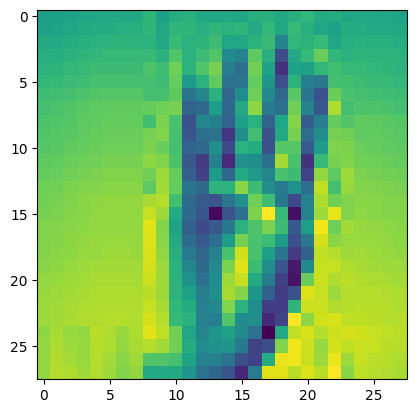

In [18]:
plt.imshow(images[0][0].reshape(28, 28))
print(images[0][1])

In [19]:
len(images)

9

## Archivos Base 64

Vamos a trabajar con el json de la carpeta _sign_mnist_base64_. Importamos las librerias necesarias

In [20]:
import base64

Guardamos la ruta del archivo en una variable

In [21]:
url = './sign_mnist_base64/data.json'

Cargamos los datos de json a memoria

In [22]:
with open(url) as f:
    data = json.load(f)

Mostramos el contenido cargado

In [23]:
print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


- Cargamos los datos en una variable.
- Determinamos la locación a guardar la imagen.
- Abrimos un archivo con el seudónimo de file_to_save.
- Decodificamos el BASE64 y lo guardamos en un buffer.
- Guardamos en esta locación.

In [25]:
# carga de los datos
base64_img_byte = data['b'].encode('utf-8')
# ruta donde guardar la imagen
path_img = './images.png'

# abrir el archivo
with open(path_img, 'wb') as file_to_save:
    # decodificamos la imagen
    decoded_image_data = base64.decodebytes(base64_img_byte)
    file_to_save.write(decoded_image_data) 

Abrimos la imagen con PIL

In [26]:
img = Image.open(path_img)
img

## Entendiendo la anatomia de las imagenes